# Importing packages

In [1]:
# Import data reader to directly convert Yahoo Finance data into dataframe
import yfinance as yf
import yahoo_fin
from yahoo_fin import options

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from datetime import datetime
from functools import reduce

# Import data reader to directly convert Yahoo Finance data into dataframe
from pandas_datareader import data as pdr
yf.pdr_override()

from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats
from scipy.stats import norm
from math import log, sqrt, pi, exp

sns.set_style('darkgrid')

style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Collecting data

In [3]:
def stock_prices_returns(ticker, start_date, end_date):
    global stock
    stock = pdr.get_data_yahoo(ticker, start = start_date, end = end_date)[['Adj Close']]
    stock['return'] = stock.pct_change()
    stock.dropna(inplace = True)
    return stock

tickerSymbol = 'AMZN'

stock_prices_returns(tickerSymbol, '2022-12-01', '2023-08-15')

[*********************100%***********************]  1 of 1 completed


<ipython-input-3-5572e89fa3c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['return'] = stock.pct_change()
<ipython-input-3-5572e89fa3c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.dropna(inplace = True)


,Adj Close,return
Date,,
2022-12-02,94.129997,-0.014346
2022-12-05,91.010002,-0.033146
2022-12-06,88.250000,-0.030326
2022-12-07,88.459999,0.002380
2022-12-08,90.349998,0.021366
2022-12-09,89.089996,-0.013946
2022-12-12,90.550003,0.016388
2022-12-13,92.489998,0.021425
2022-12-14,91.580002,-0.009839


[Text(0.5, 1.0, 'AMZN'), Text(0, 0.5, 'Price per share')]

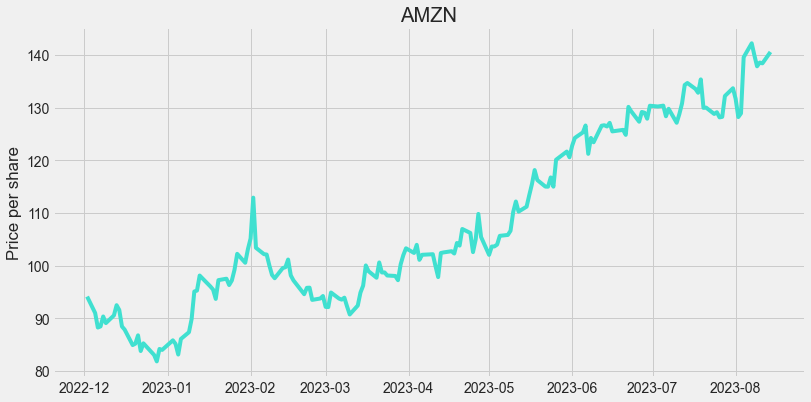

In [4]:
#plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(stock['Adj Close'], color = 'turquoise')
ax.set(title = tickerSymbol, ylabel = 'Price per share')

[Text(0.5, 1.0, 'Distribution of Returns')]

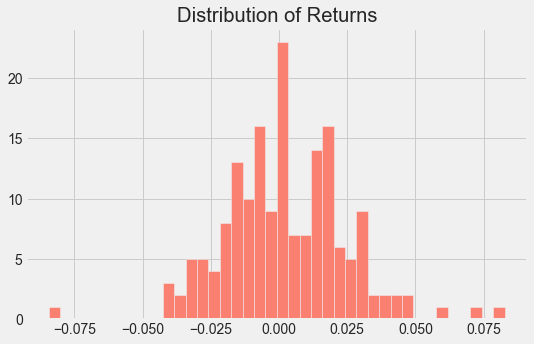

In [5]:
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(stock['return'], color='salmon', bins=40)
ax.set(title='Distribution of Returns')

The distribution of returns is almost normal except for a slight skew and fatter tail, hence Black Scholes assumption of normally distributed returns 

## Options Data

In [6]:
#Get expiration dates
expiration_dates = options.get_expiration_dates(tickerSymbol)
expiration_dates

['August 25, 2023',
 'September 1, 2023',
 'September 8, 2023',
 'September 15, 2023',
 'September 22, 2023',
 'September 29, 2023',
 'October 20, 2023',
 'November 17, 2023',
 'December 15, 2023',
 'January 19, 2024',
 'February 16, 2024',
 'March 15, 2024',
 'April 19, 2024',
 'June 21, 2024',
 'September 20, 2024',
 'January 17, 2025',
 'June 20, 2025',
 'December 19, 2025']

In [7]:
# Get options data for each expiration date
expiration_dates= options.get_expiration_dates(tickerSymbol)

options_chain = {}
for date in expiration_dates:
    options_chain[date] = options.get_options_chain(tickerSymbol)

In [8]:
# Options info for Oct 20,2023 expiration call options
calls = options_chain['October 20, 2023']['calls']
calls

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,AMZN230825C00065000,2023-08-22 11:15AM EDT,65.0,70.20,70.65,70.80,0.00,-,3,4,346.88%
1,AMZN230825C00075000,2023-08-23 1:33PM EDT,75.0,60.90,60.65,60.80,1.05,+1.75%,1,15,284.38%
2,AMZN230825C00080000,2023-08-23 11:51AM EDT,80.0,55.09,55.45,55.80,0.89,+1.64%,8,43,277.73%
3,AMZN230825C00085000,2023-08-23 1:21PM EDT,85.0,50.80,50.60,50.80,1.85,+3.78%,15,26,220.31%
4,AMZN230825C00090000,2023-08-23 12:04PM EDT,90.0,45.19,45.60,45.95,1.20,+2.73%,50,87,216.80%
5,AMZN230825C00095000,2023-08-21 2:44PM EDT,95.0,38.93,40.60,40.80,-0.82,-2.06%,5,66,172.66%
6,AMZN230825C00100000,2023-08-22 3:07PM EDT,100.0,34.44,35.55,35.75,0.00,-,23,146,129.69%
7,AMZN230825C00105000,2023-08-23 12:57PM EDT,105.0,30.40,30.60,31.00,1.15,+3.93%,12,383,147.66%
8,AMZN230825C00110000,2023-08-23 1:33PM EDT,110.0,25.90,25.55,25.75,1.59,+6.54%,4,246,92.19%
9,AMZN230825C00114000,2023-08-23 1:24PM EDT,114.0,21.75,21.65,21.85,1.68,+8.37%,11,48,100.00%


In [9]:
# Options info for Oct 20,2023 expiration put options
puts = options_chain['October 20, 2023']['puts']
puts

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,AMZN230825P00065000,2023-08-23 9:30AM EDT,65.0,0.01,0.00,0.01,0.00,-,1,21,256.25%
1,AMZN230825P00070000,2023-07-18 10:31AM EDT,70.0,0.02,0.00,0.01,0.00,-,2,2,231.25%
2,AMZN230825P00075000,2023-08-04 12:47PM EDT,75.0,0.01,0.00,0.01,0.00,-,7,25,212.50%
3,AMZN230825P00080000,2023-08-04 12:46PM EDT,80.0,0.01,0.00,0.01,0.00,-,6,87,187.50%
4,AMZN230825P00085000,2023-08-18 11:21AM EDT,85.0,0.01,0.00,0.01,0.00,-,2,248,168.75%
5,AMZN230825P00090000,2023-08-11 1:58PM EDT,90.0,0.01,0.00,0.01,0.00,-,28,306,150.00%
6,AMZN230825P00095000,2023-08-18 2:24PM EDT,95.0,0.01,0.00,0.01,0.00,-,6,229,131.25%
7,AMZN230825P00100000,2023-08-23 9:31AM EDT,100.0,0.01,0.00,0.01,0.00,-,3,1022,112.50%
8,AMZN230825P00105000,2023-08-21 9:39AM EDT,105.0,0.01,0.00,0.01,0.00,-,6,1439,96.88%
9,AMZN230825P00110000,2023-08-23 12:50PM EDT,110.0,0.01,0.00,0.01,0.00,-,4,956,81.25%


## Black Scholes

### Parameters

In [10]:
# Spot price S (current price)

S = stock['Adj Close'].iloc[-1]
S

140.57000732421875

In [11]:
# Strike price X 
X = 142

In [12]:
# time to Maturity(T)
expiry = '17-11-2023'
today = datetime.now()
T = (datetime.strptime(expiry, "%d-%m-%Y") - today).days/365
T

0.2328767123287671

In [13]:
# Risk-Free rate (r), we will use the US Treasury Yield '^TNX'
r = (pdr.get_data_yahoo('^TNX')['Adj Close'].iloc[-1]) / 100
r

[*********************100%***********************]  1 of 1 completed


0.04197999954223633

In [14]:
# Volatility (sigma)

def sigma(df):
  daily_volatility = df['return'].std()
  yearly_trade_days = 252
  sigma = np.sqrt(yearly_trade_days) * daily_volatility
  return sigma

sigma(stock)

0.3533294843406683

In [15]:
## Combining all parameters in one cell

# S is the current spot price of underlying stock
S = stock['Adj Close'].iloc[-1]

# X is the option strike price
# T is the time until maturity (in fractions of a year)

today = datetime.now()
T = (datetime.strptime(expiry, "%d-%m-%Y") - datetime.now()).days / 365

# r is the risk free rate, which we'll use as the 10-year U.S. Treasury Yield '^TNX'
today = datetime.now()
r = (pdr.get_data_yahoo('^TNX')['Adj Close'].iloc[-1]) / 100

# sigma is the yearly returns volatility of the underlying stock
daily_volatility = stock['return'].std()
yearly_trade_days = 252
sigma = np.sqrt(yearly_trade_days) * daily_volatility

[*********************100%***********************]  1 of 1 completed


## Defining Black Scholes function

In [16]:
# d1 is the probability of receiving the stock at expiration 
def d11(S, X, T, r, sigma):
    return (np.log(S/X) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))

# d2 is the risk-adjusted probability that the option will be exercised
def d21(d1, T, sigma):
    return d1 - sigma * np.sqrt(T)

# Black-Scholes European option pricing formula    
def black_scholes(S, X, T, r, sigma, option_type):
    global d_one, d_two
    d_one = d11(S, X, T, r, sigma)
    d_two = d21(d_one, T, sigma)
    if option_type == 'call':
        return S * norm.cdf(d_one) - np.exp(-r * T) * X * norm.cdf(d_two)
    elif option_type == 'put':
        return -(S * norm.cdf(-d_one) - np.exp(-r * T) * X * norm.cdf(-d_two))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is neither 'call' or 'put'.")

## Option Premiums

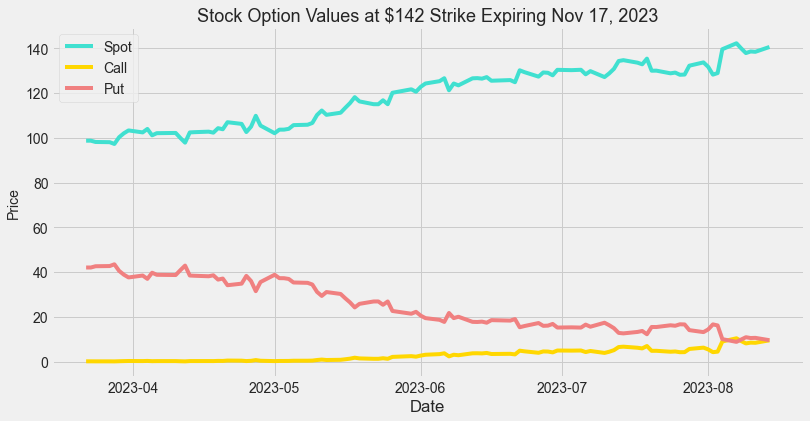

In [17]:
# Last 100 spot prices
stock_spot = stock['Adj Close'][-100:]

# Initialize the European put option values array
call_option_values = np.zeros(stock_spot.size)
put_option_values = np.zeros(stock_spot.size)

# Iterate through spot prices and compute the option values
for i,S in enumerate(stock_spot.values):
    call_option_values[i] = black_scholes(S = S, X = X, T = T, r = r, sigma = sigma, option_type = 'call')
    put_option_values[i] = black_scholes(S = S, X = X, T = T, r = r, sigma = sigma, option_type = 'put')

options_values=pd.DataFrame({'spot_price':stock_spot, 'call_option_value':call_option_values, 'put_option_value':put_option_values})

plt.figure(figsize=(12,6))
sns.lineplot(data=options_values['spot_price'], color='turquoise')
sns.lineplot(data=options_values['call_option_value'], color='gold')
sns.lineplot(data=options_values['put_option_value'], color='lightcoral')
plt.ylabel('Price', fontsize=14)
plt.title('Stock Option Values at $142 Strike Expiring Nov 17, 2023', fontsize=18)
plt.legend(labels=['Spot','Call','Put'])

In [18]:
# Call option premium
price_call = black_scholes(S = S, X = X, T = T, r = r, sigma = sigma, option_type = 'call')
price_call

9.527759455598172

In [19]:
# Put option premium
price_put = black_scholes(S = S, X = X, T = T, r = r, sigma = sigma, option_type = 'put')
price_put

9.576300455795703

## Implied Volatility

In [20]:
def call_implied_volatility(Price, S, X, T, r):
    sigma = 0.001
    while sigma < 1:
        Price_implied = black_scholes(S=S, X=X, T=T, r=r, sigma=sigma, option_type='call')
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"

def put_implied_volatility(Price, S, X, T, r):
    sigma = 0.001
    while sigma < 1:
        Price_implied = black_scholes(S=S, X=X, T=T, r=r, sigma=sigma, option_type='put')
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"

In [21]:
print("Put Implied Volatility: " + str(round(100 * put_implied_volatility(puts[puts['Strike']==X]['Last Price'].values[0], S, X, T, r),2))+ " %")

Put Implied Volatility: 23.6 %


## Volatility smile

Text(0.5, 1.0, 'Implied Volatility for Put Option Expiring Nov 17, 2023')

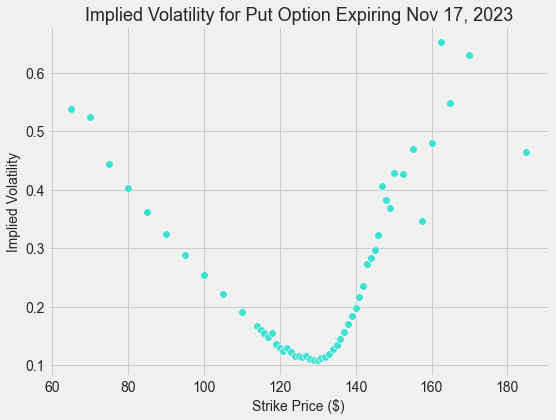

In [22]:
strikes = puts['Strike']

# Initialize implied volatilty (IV) array
put_IV = np.zeros(strikes.size)

# Iterate through strike prices and compute the implied volatility
for i,X in enumerate(strikes.values):
  put_IV[i] = put_implied_volatility(puts[puts['Strike']==X]['Last Price'].values[0], S, X, T, r)
  
IV_values=pd.DataFrame({'strike_price':strikes, 'put_implied_volatility':put_IV})

plt.figure(figsize=(8,6))
sns.scatterplot(data=IV_values, x='strike_price', y='put_implied_volatility', color='turquoise', s=60)
plt.xlabel('Strike Price ($)', fontsize=14)
plt.ylabel('Implied Volatility', fontsize=14)
plt.title('Implied Volatility for Put Option Expiring Nov 17, 2023', fontsize=18)

As we can see from the curve (slight volatility smile), volatility isn't constant, but changes with strike price. Our put option implied volatility isn't toward the minimum implied volatility.

## Greeks

In [23]:
# Set parameters again as we iterated through them before
S = stock['Adj Close'].iloc[-1]
X = 142
T = (datetime.strptime(expiry, "%d-%m-%Y") - datetime.now()).days / 365
r = (pdr.get_data_yahoo('^TNX')['Adj Close'].iloc[-1]) / 100
sigma = np.sqrt(yearly_trade_days) * daily_volatility

def put_greeks(S, X, T, r, sigma, d1):
  # Returns dataframe of greeks 

  global greeks_df

  delta = -norm.cdf(-d11(S,X,T,r,sigma))
  gamma = norm.pdf(d11(S,X,T,r,sigma))/(S*sigma*sqrt(T))
  vega = 0.01*(S*norm.pdf(d11(S,X,T,r,sigma))*sqrt(T))
  theta = 0.01*(-(S*norm.pdf(d11(S,X,T,r,sigma))*sigma)/(2*sqrt(T)) + r*X*exp(-r*T)*norm.cdf(-d21(d1,T,sigma)))
  rho = 0.01*(-X*T*exp(-r*T)*norm.cdf(-d21(d1,T,sigma)))

  greeks_dict = {'Delta: change in option price with $1 change in underlying asset price (velocity)':delta, 
                 'Gamma: change in delta with $1 change in underlying asset price (acceleration)':gamma, 
                 'Vega: change in option price with 1% change in implied volatility':vega,
                 'Theta: change in option price with 1 day change toward expiration (time decay)':theta,
                 'Rho: change in option price with 1% change in interest rate':rho}
  greeks_df = pd.DataFrame.from_dict(greeks_dict, orient='index', columns=['Greeks'])
  return greeks_df

put_greeks(S=S, X=X, T=T, r=r,sigma=sigma,d1=d_one)

[*********************100%***********************]  1 of 1 completed


,Greeks
Delta: change in option price with $1 change in underlying asset price (velocity),-0.466835
Gamma: change in delta with $1 change in underlying asset price (acceleration),0.016587
Vega: change in option price with 1% change in implied volatility,0.269688
Theta: change in option price with 1 day change toward expiration (time decay),-0.151888
Rho: change in option price with 1% change in interest rate,-0.292359


In [24]:
# Convert string dates to datetime and then to annualized form
def convert_timestamp(x, from_pattern, to_pattern):
  expiration_dates = datetime.strptime(x, from_pattern)
  return datetime.strftime(expiration_dates, to_pattern)

expiration_dates = [convert_timestamp(x, '%B %d, %Y', '%m-%d-%Y') for x in expiration_dates]
expiration_dates = [((datetime.strptime(T, "%m-%d-%Y") - datetime.now()).days / 365) for T in expiration_dates]
expiration_dates = pd.Series(expiration_dates)

Text(0.5, 1.0, 'Delta for Put Option by Time to Expiry')

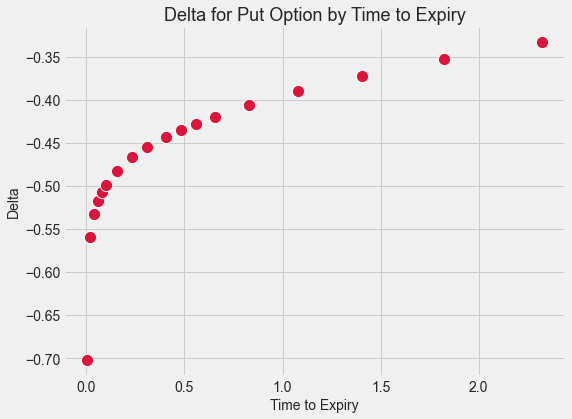

In [25]:
# Initialize delta array
put_delta = np.zeros(expiration_dates.size)

# Iterate through strike prices and compute the implied volatility
for i,T in enumerate(expiration_dates.values):
  put_delta[i] = -norm.cdf(-d11(S,X,T,r,sigma))
  
delta_values=pd.DataFrame({'expiration_date':expiration_dates, 'delta':put_delta})

plt.figure(figsize=(8,6))
sns.scatterplot(data=delta_values, x='expiration_date', y='delta', color='crimson', s=150)
plt.xlabel('Time to Expiry', fontsize=14)
plt.ylabel('Delta', fontsize=14)
plt.title('Delta for Put Option by Time to Expiry', fontsize=18)

## Delta Hedging

In [26]:
S = stock['Adj Close'].iloc[-1]
X = 142
T = (datetime.strptime(expiry, "%d-%m-%Y") - datetime.now()).days / 365
r = (pdr.get_data_yahoo('^TNX')['Adj Close'].iloc[-1]) / 100
sigma = np.sqrt(yearly_trade_days) * daily_volatility

def delta_neutral(shares):
  # returns statement of number of options needed for delta hedge based on number of shares of underlying asset

  asset_delta = 1
  asset_total_delta = shares * asset_delta
  option_delta = greeks_df.iloc[0,0]
  option_total_delta = -asset_total_delta
  shares_per_option = 100

  global n
  n = option_total_delta / option_delta / shares_per_option 
  
  return print('We need to buy {} put options for a delta-neutral position.'.format(round(n)))


delta_neutral(100)

[*********************100%***********************]  1 of 1 completed
We need to buy 2 put options for a delta-neutral position.


Our delta neutral portfolio would be 100 shares of AMZN and 2 put option

In [27]:
# Market price of put option at our strike price
option_price = puts[puts['Strike']==X]['Last Price'].values[0]
print('Price of put options contract is ${}'.format(option_price))
print('Option contract value (cash outlay) to delta hedge AMZN is ${}'.format(round(n * option_price * 100),2))

Price of put options contract is $6.4
Option contract value (cash outlay) to delta hedge AMZN is $1371


Waht if AMZN price declined by $1?

In [28]:
value = black_scholes(S = S, X = X, T = T, r = r, sigma = sigma, option_type = 'put')
option_delta = greeks_df.iloc[0,0]

# Find the option value change when the price decrease by 1
value_change = black_scholes(S = S-1, X = X, T = T, r = r, sigma = sigma, option_type = 'put') - value

# Total change of both stock and option
-1 + (value_change / abs(option_delta))

0.01782585004498327